In [1]:
import mujoco
import mujoco_viewer
import matplotlib.pyplot as plt
import numpy as np
import os
from lxml import etree
import mujoco.viewer
import time
from tendon import generate_tendon_xml

In [2]:
R1, R2, a, b, c = 0.025, 0.049, 0.068, 0.056, 0.091

xml = generate_tendon_xml(R1, R2, a, b, c)

model = mujoco.MjModel.from_xml_string(xml.encode("utf-8"))
data = mujoco.MjData(model)

In [3]:
with mujoco.viewer.launch_passive(model, data) as viewer:
    while viewer.is_running():
        mujoco.mj_step(model, data)
        viewer.sync()
        time.sleep(0.001)

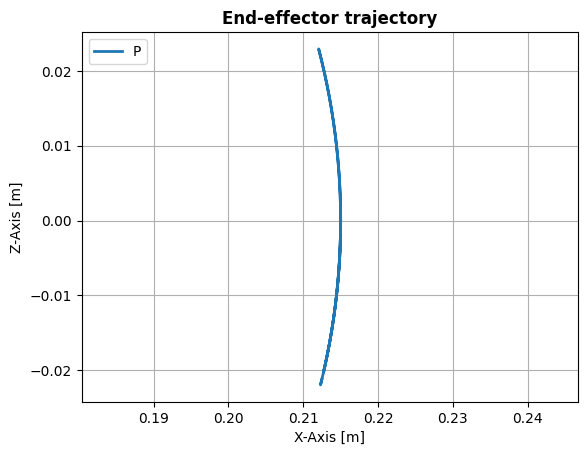

In [4]:
def set_torque(mj_data, time, a, f, p):
    data.ctrl[0] = a * np.sin(time * f + p)
    data.ctrl[1] = -data.ctrl[0]


SIMEND = 20
TIMESTEP = 0.001
STEP_NUM = int(SIMEND / TIMESTEP)
A = 3
F = 30
P = 0

sensor_pos_x = []
sensor_pos_z = []

viewer = mujoco_viewer.MujocoViewer(model, data, title="4bar", width=1920, height=1080)

for i in range(STEP_NUM):
    if viewer.is_alive:
        set_torque(data, data.time, A, F, P)

        sensor_pos = data.sensordata[:3]
        sensor_pos_x.append(sensor_pos[0])
        sensor_pos_z.append(sensor_pos[2])

        mujoco.mj_step(model, data)
        viewer.render()

    else:
        break
viewer.close()

midlength = int(STEP_NUM/2)

plt.clf()
plt.plot(sensor_pos_x, sensor_pos_z, '-', linewidth=2, label='P')
plt.title('End-effector trajectory', fontsize=12, fontweight='bold')
plt.legend(loc='upper left')
plt.xlabel('X-Axis [m]')
plt.ylabel('Z-Axis [m]')
plt.axis('equal')
plt.grid()
plt.draw()
